# HW2

## Question #1

For this question, we are going to use a data set of [the top grossing movies between 2007 and 2011](https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv).

1. Ingest the data as a pandas data frame.

2. Inspect the data and explain what it contains.

3. Count how many top grossing movies each studio made between 2007 and 2011, and visualize it as a bar chart.

4. Convert your bar chart above into a pie chart.

5. Make a cross-tabulation of Genres against the Year, and observe that the data contains errors. Correct the errors using 'replace' method then cross-tabulate again.

6. Draw a 'heat-map' of the corrected cross-tabulation you got above.

Urlopen : Provides us to reach a file without downloading it to local.<br>
Pandas : Provides us the capability to do DataFrame computations.<br>
Numpy : Provides us the capability to do Matrix(arrays) computations.<br>
Counter : Provides us to count objects.<br>
Pyplot : Provides us to visualize a data in different ways.<br>
Seaborn : Provides us a heat-map of a data.<br>

In [84]:
from urllib.request import urlopen
import pandas as pd
import numpy as np

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

Q1-1) We get the file with url and the file has .csv format extension. After that, we convert the raw data to pandas data frame by read_csv() which is a method of pandas library.

In [85]:
urlmovies = "https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv"
with urlopen(urlmovies) as url:
    data = pd.read_csv(url, encoding= 'UTF-8', sep=",")

data.head(10)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008
5,Water For Elephants,Drama,20th Century Fox,72,3.081421,60,$117.09,2011
6,WALL-E,Animation,Disney,89,2.896019,96,$521.28,2008
7,Waitress,Romance,Independent,67,11.089742,89,$22.18,2007
8,Waiting For Forever,Romance,Independent,53,0.005000,6,$0.03,2011
9,Valentine's Day,Comedy,Warner Bros.,54,4.184038,17,$217.57,2010


Q1-2) The Data is about the top grossing movies between 2007 and 2011. The Data contains 8 columns:<br>

1. Film : Movie name (categorical: Youth in Revolt, When in Rome, ..., Waitress)<br>
2. Genre : Type of the movie (categorical: Romance, Comedy, Action, ..., Fantasy)<br>
3. Lead Studio : Producer of the movie (categorical: The Weinstein Company, Independent, Disney, ..., Fox)<br>
4. Audience score % : Ranking ratio according to audience in percent(numeric)<br>
5. Profitability Index of the movie(numeric)<br>
6. Rotten Tomatoes %: Ranking ratio according to members of Rotten Tomatoes in percent(numeric)<br>
7. Worldwide Gross: the revenue of the movie (numeric)<br>
8. Year : Release year of the movie (numeric)<br>
    

In [86]:
data.columns

Index(['Film', 'Genre', 'Lead Studio', 'Audience score %', 'Profitability',
       'Rotten Tomatoes %', 'Worldwide Gross', 'Year'],
      dtype='object')

Q1-3) First we get the rows whose year between 2007 and 2011 with loc() using condition.

In [87]:
data0711=data.loc[(data['Year']>=2007) & (data['Year']<=2011)]
pd.unique(data0711.loc[:,'Year'])

array([2008, 2010, 2011, 2007, 2009], dtype=int64)

Counter method, from collections library, provides us the amounts of the values as array from the specified column,'Lead Studio', in DataFrame. We reach to the Studios with keys() and we reach to the Amounts with values().

To visualize the data, we use barh() here which is a method of matplot. Furthermore, we also use rcParams to set a suitable figsize.

<BarContainer object of 13 artists>

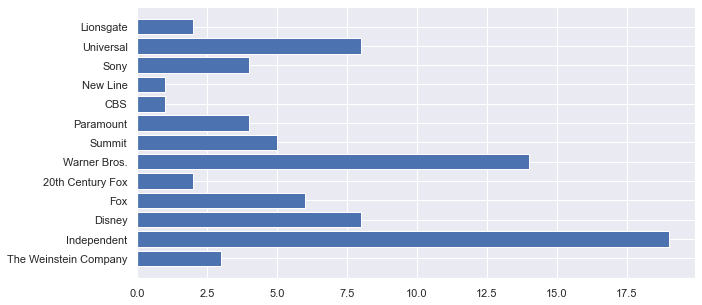

In [88]:
studio = Counter(data0711['Lead Studio'])
stdlabels = list(studio.keys())
stdvalues = studio.values()

plt.rcParams['figure.figsize'] = 10,5
plt.barh(stdlabels,stdvalues)

Q1-4) For better view, We use explode parameter of pie() to explode the slices. To figure it we use show().

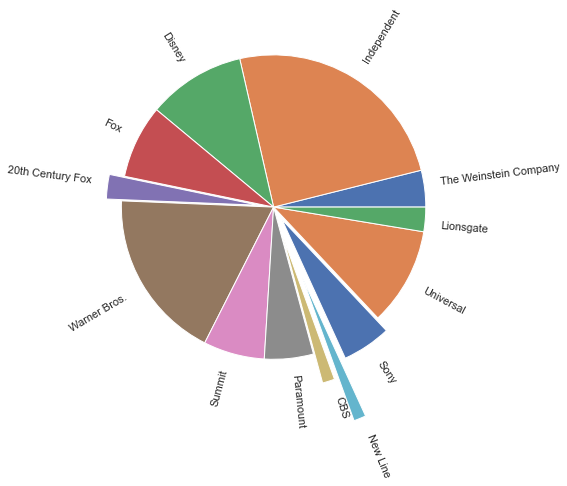

In [89]:
vs = 100*np.array(list(studio.values()))/sum(studio.values())
ex = [0,0,0,0,0.1,0,0,0,0.2,0.5,0.1,0,0]
plt.rcParams['figure.figsize'] = 7,7
plt.pie(vs, labels=stdlabels, explode=ex, rotatelabels=True)
plt.show()

Q1-5) We observe that in the Dataframe, there are multiple genres that have the same meaning with each other. As can be seen below :
* Comdy, Comedy, comedy.
* Romance, Romence, romance.

In [90]:
crosstb = pd.crosstab(data['Genre'],data['Year'])
crosstb

Year,2007,2008,2009,2010,2011
Genre,,,,,
Action,0,0,0,1,0
Animation,0,1,0,1,2
Comdy,0,1,0,0,0
Comedy,6,12,6,16,1
Drama,0,3,5,2,3
Fantasy,0,1,0,0,0
Romance,4,2,0,0,7
Romence,0,0,0,0,1
comedy,0,0,1,0,0


Replace() is used here to correct values one by one for a better result. Then we again crosstab() on the corrected DataFrame with respect to Genre and Year.

In [91]:
data['Genre']=data['Genre'].astype(str)
data['Genre']=data['Genre'].str.replace('comedy','Comedy',regex=True)
data['Genre']=data['Genre'].str.replace('Comdy','Comedy',regex=True)
data['Genre']=data['Genre'].str.replace('Romence','Romance',regex=True)
data['Genre']=data['Genre'].str.replace('romance','Romance',regex=True)

crosstb = pd.crosstab(data['Genre'],data['Year'])
crosstb

Year,2007,2008,2009,2010,2011
Genre,,,,,
Action,0,0,0,1,0
Animation,0,1,0,1,2
Comedy,6,13,7,16,1
Drama,0,3,5,2,3
Fantasy,0,1,0,0,0
Romance,5,2,0,0,8


Q1-6) We draw a heat-map of the corrected DataFrame by using heatmap(). We can observe that the movies between 2007 and 2011 in the list are mostly 'Comedy'.

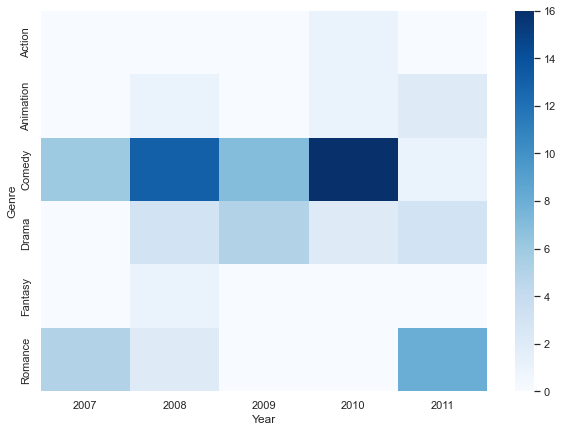

In [92]:
plt.rcParams['figure.figsize'] = 10,7
dataheat = sns.heatmap(crosstb,cmap='Blues')

## Question #2

For this question, we are going to use the [Open Flight Data](https://openflights.org/data.html#route).

1. Find the link for the data from the link I gave above. Ingest it as a pandas data frame.

2. Inspect it and explain what it contains.

3. Construct a data frame that contains 3 columns: source airport, target airport and the number of flights from source to target.

4. Filter the data frame and select only the routes that has 10 or more flights between them.

5. Construct a network using the `networkx` library that I used in our last lecture using the data frame you constructed in the previous step.

6. Visualize the network.

Networkx : Provides us to visualise the data with graph.

In [93]:
import networkx as nx

Q2-1) We ingest the data as a pandas DataFrame. Because of no columns, by accessing the link, we find enough information such as which column reserves what. Also even the file format is .dat, we can read it with read_csv().

In [94]:
urlroutes = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat"
with urlopen(urlroutes) as url:
    #lines = url.readlines()
    colnames = ['Airline','Airline ID','Src Airpt','Src Airpt ID','DESTN Airpt','DESTN Airpt ID','CodeShare','Stops','Eqpt' ]
    dataroutes= pd.read_csv(url, encoding='UTF-8', names=colnames)

Q2-2) The Data contains 9 columns:<br>

   1. Airline: 2-letter (IATA) or 3-letter (ICAO) code of the airline.(categorical: '2B', 'ZL', ..., 'ZM')<br>
   2. Airline ID: Unique OpenFlights identifier for airline (numeric)<br>
   3. Src Airpt: 3-letter (IATA) or 4-letter (ICAO) code of the source airport.(categorical: 'AER', 'ASF', 'WYA', ..., 'FRU')<br>
   4. Src Airpt ID: Unique OpenFlights identifier for source airport (numeric)<br>
   5. DESTN Airpt: 3-letter (IATA) or 4-letter (ICAO) code of the destination airport.(categorical: 'KZN', 'MRV', 'OVB', ..., 'ADL')<br>
   6. DESTN Airpt ID: Unique OpenFlights identifier for destination airport (numeric)<br>
   7. Codeshare: "Y" if this flight is a codeshare (that is, not operated by Airline, but another carrier), empty otherwise.(categorical: 'Y', null)<br>
   8. Stops: Number of stops on this flight ("0" for direct) (numeric)<br>
   9. Eqpt: 3-letter codes for plane type(s) generally used on this flight, separated by spaces (categorical: 'CR2', 'SF3', ..., '734')<br>

In [95]:
dataroutes

,Airline,Airline ID,Src Airpt,Src Airpt ID,DESTN Airpt,DESTN Airpt ID,CodeShare,Stops,Eqpt
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


Q2-3) A new DataFrame newdf is created and columns 'Src Aipt' and 'DESTN Airpt' are appended to newdf. 

In [96]:
newdf = dataroutes.loc[:,['Src Airpt','DESTN Airpt']]

We iter unique values of 'Src Airpt'. While iteration process:
    
  For an airport X, we filter newdf with X for column 'Src Airpt'. We use counter on column 'DESTN Airpt' of the filtered data. So far, we can find the count of every flight route from X to others. Moreover, we create a new DataFrame by combining keys and values of counter. Finally, we append the new DataFrame to result DataFrame 'res'.
  
  Thus, we have all the flight routes and their count.

In [97]:
res = pd.DataFrame(columns = ['Src Airpt','DESTN Airpt', '# of Flights'])
uniqueSRC = pd.unique(newdf['Src Airpt'])
#uniqueSRC = ['AER','ALA']
for x in uniqueSRC:
    filtereddf = newdf.loc[newdf['Src Airpt']==x]
    counterdf = Counter(filtereddf['DESTN Airpt'])
    
    srcairpt = [x for y in range(len(counterdf.keys()))]
    
    df = pd.DataFrame({'Src Airpt': srcairpt,
                   'DESTN Airpt': counterdf.keys(),
                 '# of Flights':counterdf.values()})
    res = res.append(df)
res

,Src Airpt,DESTN Airpt,# of Flights
0,AER,KZN,1
1,AER,DYU,1
2,AER,KIV,1
3,AER,MSQ,1
4,AER,TAS,2
...,...,...,...
0,TRO,GFN,1
1,TRO,SYD,1
0,WIN,LRE,1
1,WIN,TSV,1


We reset the index of the DataFrame.

In [98]:
res = res.reset_index().iloc[:,1:]
res

,Src Airpt,DESTN Airpt,# of Flights
0,AER,KZN,1
1,AER,DYU,1
2,AER,KIV,1
3,AER,MSQ,1
4,AER,TAS,2
...,...,...,...
37590,TRO,GFN,1
37591,TRO,SYD,1
37592,WIN,LRE,1
37593,WIN,TSV,1


Checking whether the sum of '# of  Flights' matches with rows count or not.

In [99]:
print(res['# of Flights'].sum())
pd.unique(res['# of Flights'])

67663


array([1, 2, 4, 3, 5, 6, 7, 8, 20, 10, 9, 13, 12, 11, 19], dtype=object)

Q2-4) Filtering the data frame and select only the routes that has 10 or more flights between them.

In [100]:
routes = res.loc[res['# of Flights']>=10]
routes

,Src Airpt,DESTN Airpt,# of Flights
2424,ORD,ATL,20
2434,ORD,CDG,10
2497,ORD,MSY,13
3410,BKK,SIN,10
3415,BKK,ICN,10
...,...,...,...
27680,SFO,LHR,10
27695,SFO,ATL,11
28937,KGL,EBB,11
29946,HRE,LUN,11


Q2-5) For Constructing a network we use networkx library. Graph is construchted based on the DataFrame constructed in the previous step.

In [101]:
plt.rcParams['figure.figsize'] = 9,9

routes.columns = ['source','target','count']
graph = nx.from_pandas_edgelist(pd.DataFrame(routes))
graph

Q2-6) We visualize the data with draw_kamada_kawai() which is a method of networkx, too.

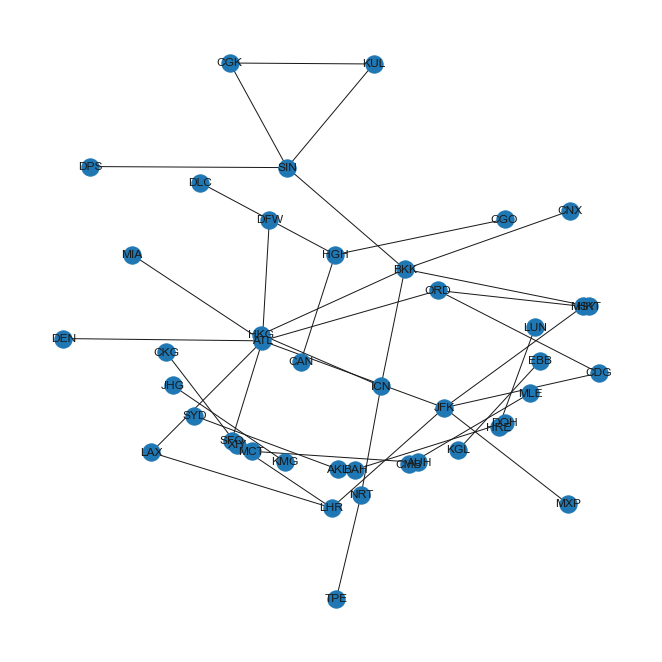

In [102]:
nx.draw_kamada_kawai(graph,with_labels=True)

## Question #3

For this question we are going to use the [NBA Data](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/) that I have shown you in our last lecture.

1. Ingest the 2019 data as a pandas data frame.

2. Inspect it and explain what it contains.

3. Write a function that takes two arguments: the NBA data frame and a 'game type' argument which can be 'regular' or 'playoff'. The function must return another pandas data frame of list of players, the number of asists, blocks and rebounds for each player. Evaluate your function on both regular games, and then on playoff games.

4. Write another function that takes two argumentas as before: the NBA data frame and the game type. The function must return the list of teams and the number of wins during the regular season or the play offs as a data frame. Visualize the returned data frame as a bar chart for both regular games, and then on playoff games.

Q3-1) Because of csv extension, we use read_csv() with an url.

In [103]:
urlnba = "https://sports-statistics.com/database/basketball-data/nba/2019-20_pbp.csv"
with urlopen(urlnba) as url:
    datanba= pd.read_csv(url)

datanba

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,Unnamed: 40
0,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,720,NOP,Jump ball: D. Favors vs. M. Gasol (L. Ball gai...,...,NaN,NaN,NaN,NaN,NaN,NaN,D. Favors - favorde01,M. Gasol - gasolma01,L. Ball - balllo01,NaN
1,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,708,NOP,L. Ball misses 2-pt jump shot from 11 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,Offensive rebound by D. Favors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,D. Favors makes 2-pt layup at rim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,689,NOP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539260,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,29,LAL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539261,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,20,LAL,D. Howard makes 3-pt jump shot from 30 ft (ass...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539262,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,15,LAL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539263,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,0,LAL,End of 4th quarter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Q3-2) The Data is about every event and every actions occured during the per basketbol matches. It contains huge amount of columns. Some of them are:

* URL: a link for related to the team that owns the event (categorical: '/boxscores/202010110MIA.html', ..., '/boxscores/201910220TOR.html')
    
* GameType: what season is. (categorical: 'regular', 'playoff')
 
* Date: the date of the match involving day, month and year. (categorical: 'October 22 2019', ..., 'October 11 2020')

* WinningTeam: name of the team who is winner of the match. (categorical: 'TOR', 'LAL, ..., 'NOP')
    
* Quarter: which part of the match. (numeric: '1','2','3','4')

* AwayTeam: guest team of the stadium. (categorical: 'TOR', 'LAL, ..., 'NOP')

* HomeTeam: owner team of the stadium.(categorical: 'TOR', 'LAL, ..., 'NOP')

* Shooter: name and id of the player who shoots. (categorical: 'D. Favors - favorde01', 'L. Ball - balllo01', ..., 'A. Caruso - carusal01')

* Blocker: name and id of the player who blocks the ball for preventing score. (categorical: 'D. Favors - favorde01', 'L. Ball - balllo01', ..., 'A. Caruso - carusal01')

* Assister: name and id of the player who assists to shooter. (categorical: 'D. Favors - favorde01', 'L. Ball - balllo01', ..., 'A. Caruso - carusal01')

* Rebounder: name and id of the player who takes the rebound of the shot. (categorical: 'D. Favors - favorde01', 'L. Ball - balllo01', ..., 'A. Caruso - carusal01')

etc.


In [104]:
datanba

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,Unnamed: 40
0,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,720,NOP,Jump ball: D. Favors vs. M. Gasol (L. Ball gai...,...,NaN,NaN,NaN,NaN,NaN,NaN,D. Favors - favorde01,M. Gasol - gasolma01,L. Ball - balllo01,NaN
1,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,708,NOP,L. Ball misses 2-pt jump shot from 11 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,Offensive rebound by D. Favors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,D. Favors makes 2-pt layup at rim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,689,NOP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539260,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,29,LAL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539261,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,20,LAL,D. Howard makes 3-pt jump shot from 30 ft (ass...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539262,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,15,LAL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539263,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,0,LAL,End of 4th quarter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Q3-3) The events has a Blocker, Asister, Rebounder or not.

In [105]:
collist = ['Blocker','Assister','Rebounder']
datanba.loc[:,collist]

,Blocker,Assister,Rebounder
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,D. Favors - favorde01
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
539260,NaN,NaN,NaN
539261,NaN,A. Caruso - carusal01,NaN
539262,NaN,NaN,NaN
539263,NaN,NaN,NaN


We want to declare a function that gives the count of blocks, asists and rebounds for each player in a dataframe.

In function, firs we set gametype. Then, by iterring the list of columns, we get arrays of every player name whether who blocks, who asists or who rebounds. We construct a result DataFrame with index of player names. Again by iterring the same list, we get who did what and how much, by grouping actions and geting counts throughout the function groupby() and size(). Moreover, we append count of the actions to the result dataframe with index of players. Finally, we set the names of columns and the names to understand the data better.

In [106]:
def playersDataFrame(data,colvalue):
    
    data = data.loc[data['GameType']==colvalue]
    
    collist = ['Blocker','Assister','Rebounder']
    
    arrayplayers = []
    
    for x in collist:
        dfPlayer = data.groupby(x).size()
        arrayplayers.extend(dfPlayer.index.array)
    
    datares = pd.DataFrame(index=arrayplayers)
    
    for x in collist:
        tmp = data.groupby(x).size()
        dfPlayer = pd.DataFrame(tmp)
        dfPlayer = dfPlayer.rename(columns = {0:x})
        datares[x] = dfPlayer[x]
    
    datares = datares.rename_axis('Player')
    datares.columns = ['Blocks','Assists','Rebounds']
    return datares



We call the function for 'regular' matches.

In [107]:
playersDataFrame(datanba,'regular')

,Blocks,Assists,Rebounds
Player,,,
A. Aminu - aminual01,8.0,21.0,87.0
A. Baynes - baynear01,23.0,67.0,237.0
A. Bradley - bradlav01,5.0,63.0,115.0
A. Burks - burksal01,17.0,189.0,282.0
A. Caruso - carusal01,18.0,124.0,123.0
...,...,...,...
Z. Collins - colliza01,5.0,16.0,70.0
Z. LaVine - lavinza01,28.0,254.0,289.0
Z. Norvell - norveza01,NaN,3.0,6.0


We call the function for 'playoff' matches.

In [108]:
playersDataFrame(datanba,'playoff')

,Blocks,Assists,Rebounds
Player,,,
A. Burks - burksal01,3.0,7.0,15.0
A. Caruso - carusal01,12.0,59.0,48.0
A. Davis - davisan02,30.0,73.0,204.0
A. Horford - horfoal01,5.0,9.0,29.0
A. Iguodala - iguodan01,13.0,31.0,54.0
...,...,...,...
V. Law - lawvi01,NaN,1.0,2.0
V. Oladipo - oladivi01,NaN,10.0,13.0
W. Gabriel - gabriwe01,2.0,4.0,10.0


Q3-4) In the function, we remove duplicates for 'Date' and 'WinningTeam'. Because, any team can only play once on the same day. After that we group the WinningTeam and take the size of it. Finally, we construct a DataFrame.

In [109]:
def teamsDataFrame(data,colvalue):
    df = data.loc[data['GameType']==colvalue]
    df = df.drop_duplicates(subset=['Date','WinningTeam'], keep='first')
    
    df = df.groupby('WinningTeam').size()
    newdf = pd.DataFrame(df)
    return newdf
    
    #dfWinningTeam = Counter(data['WinningTeam'])
    #return dfWinningTeam
    
    

We call the function for 'regular' matches.

In [110]:
dfWinReg = teamsDataFrame(datanba,'regular')
dfWinReg.head()

,0
WinningTeam,
ATL,20
BOS,48
BRK,35
CHI,22
CHO,23


We call the function for 'playoff' matches.

In [111]:
dfWinPlayoff = teamsDataFrame(datanba,'playoff')
dfWinPlayoff.head()

,0
WinningTeam,
BOS,10
DAL,2
DEN,9
HOU,5
LAC,7


We combine two DataFrame into one DataFrame here.

In [112]:
dfRegularPlayoff = pd.DataFrame()
dfRegularPlayoff.index = pd.unique(datanba['WinningTeam'])
dfRegularPlayoff = dfRegularPlayoff.rename_axis('Teams')
dfRegularPlayoff['Regular'] = dfWinReg[0]
dfRegularPlayoff['Playoff'] = dfWinPlayoff[0]
dfRegularPlayoff.head()

,Regular,Playoff
Teams,,
TOR,53,7.0
LAC,49,7.0
CHO,23,NaN
DET,20,NaN
ORL,33,1.0


We get array of all the team names as labels, and also we get arrays of counts of regular winning and playoff winning as values respectively.

In order to make a stacked bar chart, we use 'bottom' parameter for the second plot function.

Again for better view, we add label names and title.

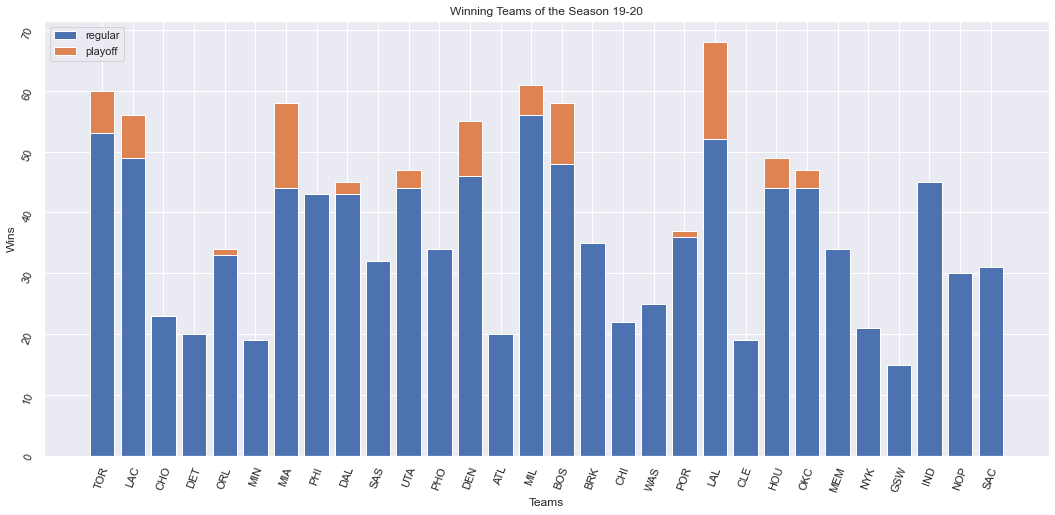

In [113]:
dflabels = dfRegularPlayoff.index.array
vsreg = dfRegularPlayoff['Regular'].values
vsplayoff = dfRegularPlayoff['Playoff'].values


plt.rcParams['figure.figsize'] = 18,8

plt.bar(dflabels,vsreg, label='regular')
plt.bar(dflabels,vsplayoff,bottom=vsreg,label='playoff')

plt.xlabel("Teams");plt.ylabel("Wins");plt.title("Winning Teams of the Season 19-20")

plt.tick_params(labelrotation=70)
plt.legend()
plt.show()


.